In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
df_train = pd.read_csv(r"C:\Users\cn4330\OneDrive - BDO AS\ML\Kaggle\kaggle_prediction_rainfall\data\train.csv", index_col="id")
df_test = pd.read_csv(r"C:\Users\cn4330\OneDrive - BDO AS\ML\Kaggle\kaggle_prediction_rainfall\data\test.csv",index_col="id")
df_sub = pd.read_csv(r"C:\Users\cn4330\OneDrive - BDO AS\ML\Kaggle\kaggle_prediction_rainfall\data\sample_submission.csv")

In [8]:
df_test.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
id,,,,,,,,,,,
2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [9]:
# sjekke om det er noen null-verdier
# df_train.isnull().sum()
df_test.isnull().sum()
# df_train.info()
# df_test.info()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [10]:
df_train.describe()
df_test.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,729.000000,730.000000
mean,183.000000,1013.503014,26.372466,23.963288,22.110274,20.460137,82.669863,76.360274,3.664384,103.923182,22.484247
std,105.438271,5.505871,5.672521,5.278098,5.170744,5.391169,7.818714,17.934121,3.639272,81.695458,9.954779
min,1.000000,1000.000000,7.400000,5.900000,4.200000,-0.000000,39.000000,0.000000,0.000000,10.000000,4.500000
25%,92.000000,1008.725000,21.600000,19.825000,17.825000,16.800000,77.250000,69.000000,0.325000,40.000000,14.500000
50%,183.000000,1012.700000,27.800000,25.650000,23.900000,22.300000,82.000000,83.000000,2.200000,70.000000,21.300000
75%,274.000000,1017.600000,31.000000,28.375000,26.400000,25.000000,89.000000,88.000000,6.675000,200.000000,28.400000
max,365.000000,1032.200000,35.800000,31.800000,29.100000,26.700000,98.000000,100.000000,11.800000,300.000000,59.500000


In [11]:
# fyll ut null-verdier i test med median-verdi
df_test['winddirection'].fillna(df_test['winddirection'].median(), inplace=True)
print(df_test.isnull().sum())

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


Plot data for å sjekke forskjell

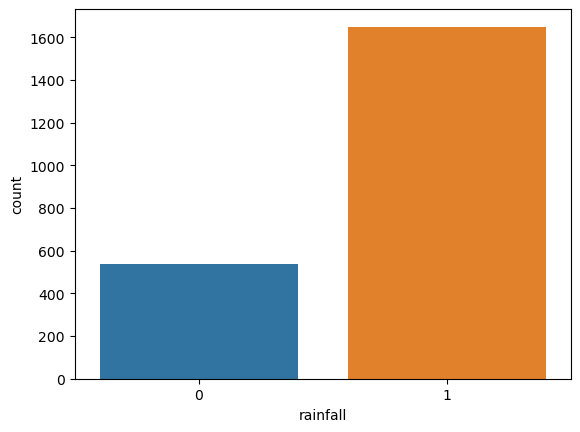

In [12]:
sns.countplot(x='rainfall', data=df_train)
plt.show()

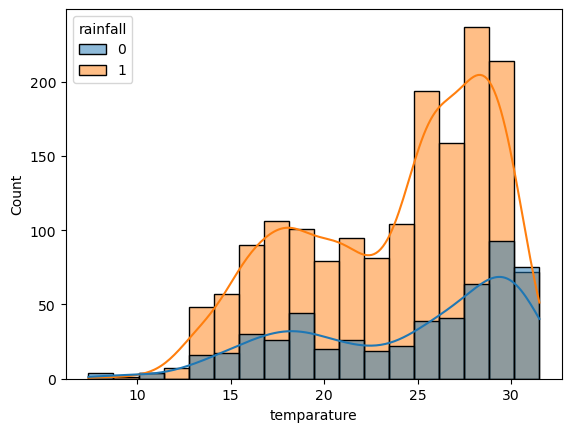

<Figure size 800x600 with 0 Axes>

In [14]:
sns.histplot(df_train, x= 'temparature', hue= 'rainfall', kde=True)
plt.figure(figsize =(8,6))
plt.show()

                    day  pressure   maxtemp  temparature   mintemp  dewpoint  \
day            1.000000  0.005337  0.146294     0.153590  0.161475  0.137929   
pressure       0.005337  1.000000 -0.800499    -0.816531 -0.814453 -0.817008   
maxtemp        0.146294 -0.800499  1.000000     0.982932  0.965529  0.906703   
temparature    0.153590 -0.816531  0.982932     1.000000  0.987150  0.933617   
mintemp        0.161475 -0.814453  0.965529     0.987150  1.000000  0.941342   
dewpoint       0.137929 -0.817008  0.906703     0.933617  0.941342  1.000000   
humidity      -0.074048 -0.119949 -0.072615    -0.025016  0.009891  0.153390   
cloud         -0.048175  0.098600 -0.289047    -0.249355 -0.219399 -0.088446   
sunshine       0.060936 -0.257163  0.452387     0.414019  0.379497  0.249676   
winddirection  0.024800 -0.643293  0.662235     0.668963  0.663828  0.643073   
windspeed     -0.000199  0.266012 -0.354168    -0.342262 -0.328871 -0.312179   
rainfall      -0.000462 -0.049886 -0.079

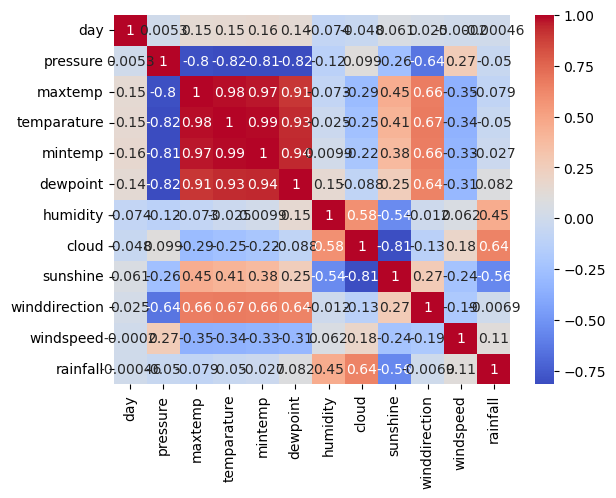

In [16]:
corr_matrix = df_train.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Splitt opp datasett i X og y

In [18]:
X= df_train.drop(['rainfall'], axis=1)
y=df_train['rainfall']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state =40)

In [20]:
model=LogisticRegression(C=0.08858667904100823, solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, solver='newton-cg')

In [21]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.867579908675799

In [23]:
#Prediction using the Test dataset
pred = model.predict_proba(df_test)[:,1]

In [25]:
#submission
df_sub['rainfall'] = pred
df_sub.to_csv('submission.csv', index=False)

In [26]:
df_sub

,id,rainfall
0,2190,0.976969
1,2191,0.983357
2,2192,0.896054
3,2193,0.218132
4,2194,0.067165
...,...,...
725,2915,0.972184
726,2916,0.949952
727,2917,0.957284
728,2918,0.989735
